In [1]:
import numpy as np
from scipy import misc,fftpack,fft
from scipy.ndimage import uniform_filter, median_filter, convolve, affine_transform, zoom
from scipy.signal import convolve2d, correlate2d
import scipy.fftpack as fp
from skimage import exposure, io, img_as_ubyte, img_as_float
from skimage.transform import rescale
from skimage.color import rgb2lab, lab2rgb, rgba2rgb, rgb2gray
from skimage.io import imread, imsave, imshow, show
#from skimage import color, viewer, data
from skimage.exposure import match_histograms, equalize_hist, rescale_intensity
from skimage.transform import warp, swirl, rescale, resize
import matplotlib.pyplot as plt
import cv2
import imageio
import math

In [2]:
#D = D(u,v) is the distance between point (u,v) in the frequency rectangle and the origin of the frequency rectangle
def distance(u,v,center):
    D = np.sqrt((u - center[0]) ** 2 + (v - center[1]) ** 2)
    return D

def ButterworthReject(shape, D0, width, n):
    H = np.zeros(shape)

    for u in range(shape[0]):
        for v in range(shape[1]):
            
            #D = D(u,v) distance between (u,v) and center of frequency rectangle
            D = distance(u,v,center)
            
            #H(u,v) = 1/(1+(DW/(D^2 - D0^2)^2n)
            if(D != D0):
                H[u][v] = 1 / (1 + (D * width / (D ** 2 - D0 ** 2)) ** (2 * n))
            else:
                H[u][v] = 1

    return H


In [14]:
#step 1 Convert the image to single or double;

lavender = io.imread("images/lavender.png")
#step 2 pad the image
padP = 1
padQ = 1
paddedLavendar = cv2.copyMakeBorder(lavender, padP, padP, padQ, padQ, cv2.BORDER_CONSTANT, value=0)

#step 3 Compute the DFT, F(u, v), of fp(x, y).
F = fp.fft2(paddedLavendar)

#step 4  Construct the desired filter in frequency domain, H, of the same size as the padded image. 
#(The centering should be the same as the DFT result in the previous step.)
#H = np.ones_like(F)
center = (paddedLavendar.shape[0] // 2, paddedLavendar.shape[1] // 2)

shape = paddedLavendar.shape
# D0 = [0,10,25,50,150]
# W = [5,25,50,100,200]
D0 = [0]
W = [5,25]
n = 1

#for each D0, W pair
imgArr = []
filterArr = []
for D in D0:
    for w in W:
        H = ButterworthReject(shape,D, w,n) 
        
        #step 5 Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication
        G = fp.ifftshift(H) * F
        #step 6 Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
        gp = np.real(fp.ifft2(G))
        #step 7 Crop the top left rectangle of gp to obtain an image of the original size
        gp = gp[:lavender.shape[0], :lavender.shape[1]]
        
        imgArr.append(gp)
        filterArr.append(H)

IndexError: list index out of range

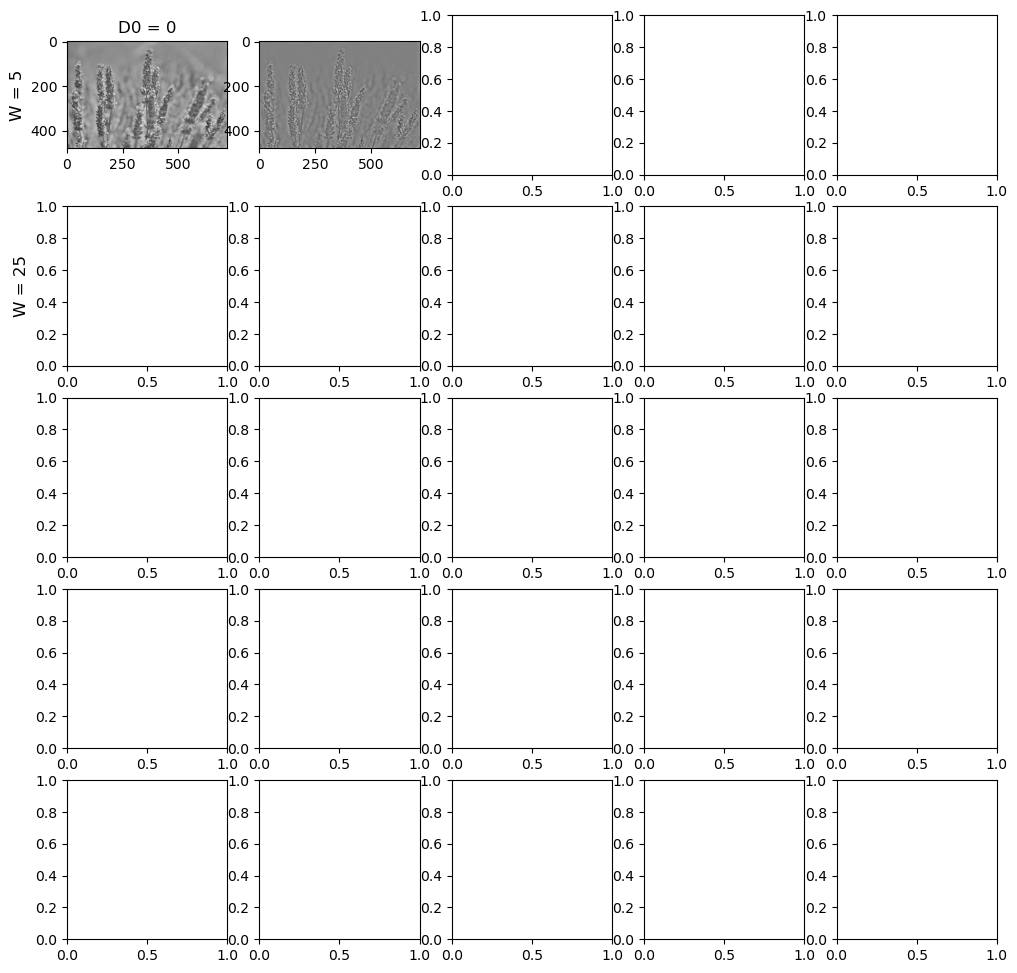

In [15]:
#displaying images
cols = ['D0 = {}'.format(col) for col in D0]
rows = ['W = {}'.format(row) for row in W]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

ax = axes.ravel()

for i in range(25):
    ax[i].imshow(imgArr[i],cmap="gray")

fig.tight_layout()
plt.show()

In [8]:
imgArr[0].mean()

149.11836112276305

In [9]:
fil_img = fp.fft2(lavender)

149.11836112276305

IndexError: list index out of range

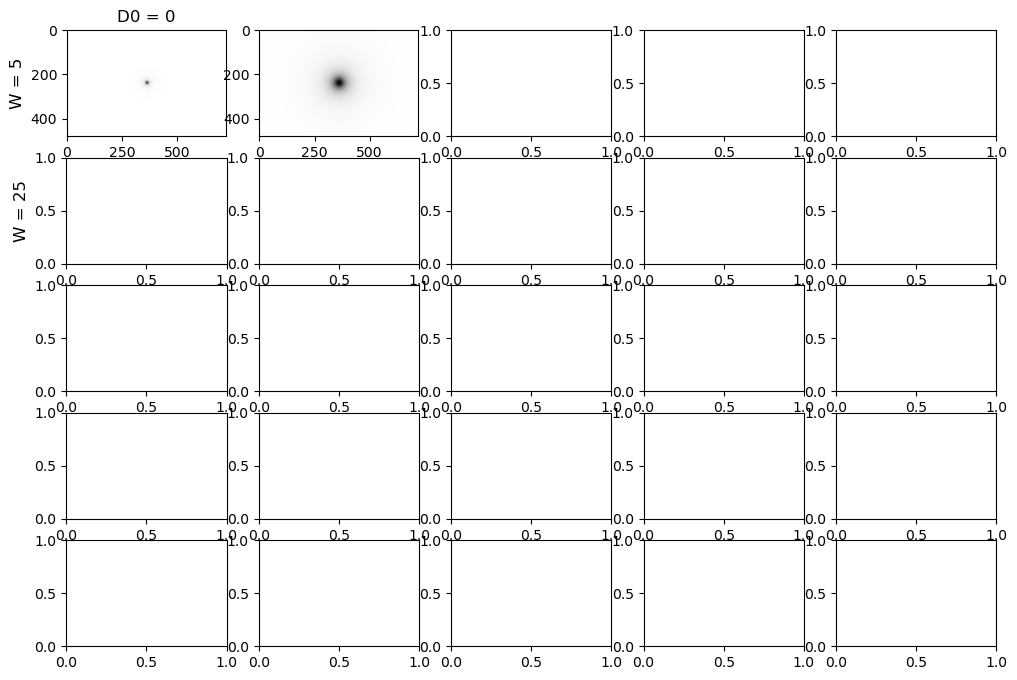

In [7]:
#filters
#Printing the requested filters
cols = ['D0 = {}'.format(col) for col in D0]
rows = ['W = {}'.format(row) for row in W]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')

ax = axes.ravel()

for i in range(25):
    ax[i].imshow(filterArr[i],cmap="gray")

fig.tight_layout()
plt.show()

In [13]:
im = img_as_float(io.imread('chap4_images/cameraman.tif'))
print(im.shape)
u = np.arange(0, im.shape[0], 1)
v = np.arange(0, im.shape[1], 1)
idx = np.where(u > im.shape[0]/2)
u[idx] = u[idx] - im.shape[0]
idy = np.where(v > im.shape[1]/2)
v[idy] = v[idy] - im.shape[1]
V, U = np.meshgrid(v, u)

u

(256, 256)


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128, -127, -126, -125,
       -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -1